# __Projet 3__

Emilie Cayatte & Cécile-Aurore Wotawa

Nous avons commencé par remettre toutes les lignes de code du projet numérique énoncé 2020.

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

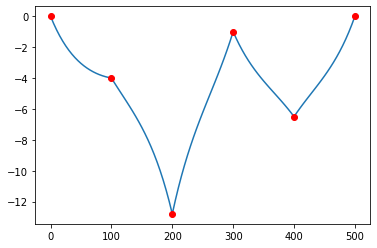

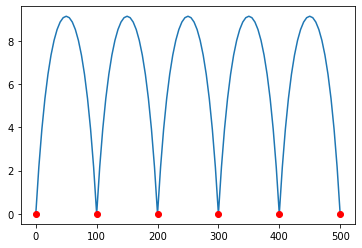

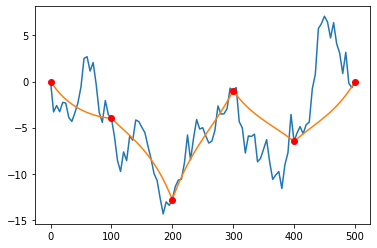

522.4391875920769


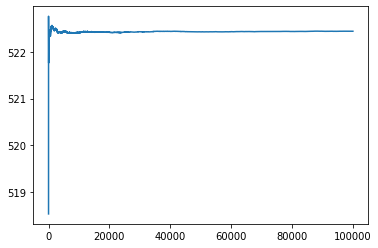

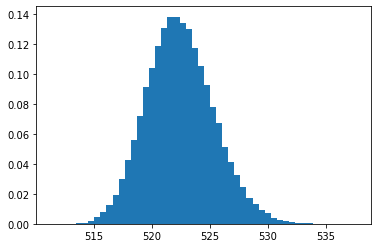

0.18579

In [24]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)

distmat=abs(np.subtract.outer(discretization,discretization))

Sigma=Covexp(distmat,a,sigma2)

SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

print(sum(result)/K)
length(allval1,Delta)

indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

plt.hist(result,50,density=True)
plt.show()

Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

np.quantile(result,[0.025,0.975])

np.mean(result>525)

## __Question 1 :__

On implémente un algorithme de type rejet.

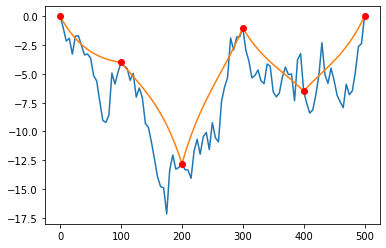

In [44]:
def simu_neg(Ec):
    Cholesky = np.linalg.cholesky(SigmaCond)
    positif = True
    while positif:
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        compteur = 0
        for elt in simu:
            if elt < 0:
                compteur += 1
        if compteur == len(simu):
            positif = False
    return simu

allval4 = np.zeros(N)
allval4[unknown_indexes]=simu_neg(Ec)
allval4[observation_indexes]=depth
plt.plot(discretization,allval4)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

## __Question 2 :__

In [45]:
K=1000
new_result = np.zeros(K)
old_result = np.zeros(K)

allval3 = np.zeros(N)
allval4 = np.zeros(N)
allval3[observation_indexes]=depth
allval4[observation_indexes]=depth

for i in range(K):
    allval4[unknown_indexes]= simu_neg(Ec)
    new_result[i]=length(allval4,Delta)
    
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    old_result[i]=length(allval3,Delta)

print(sum(new_result)/K)
print(sum(old_result)/K)

521.9706085091436
522.4672503417187


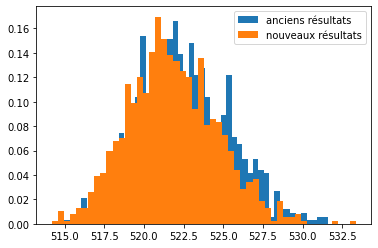

In [23]:
plt.hist(old_result,50,density=True, label = 'anciens résultats')
plt.hist(new_result,50,density=True, label = 'nouveaux résultats')
plt.legend()
plt.show()

In [18]:
print(np.quantile(old_result,[0.025,0.975]))

print(np.quantile(new_result,[0.025,0.975]))

[517.19481957 528.31834121]
[516.76814513 527.32253756]


In [19]:
print(np.mean(old_result>525))
print(np.mean(new_result>525))

0.208
0.131


In [31]:
n = 10000

def simu_neg_avec_taux():
    Cholesky = np.linalg.cholesky(SigmaCond)
    positif = True
    proba = 0
    while positif:
        proba += 1
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        compteur = 0
        for elt in simu:
            if elt < 0:
                compteur += 1
        if compteur == len(simu):
            positif = False
    return (proba-1)/proba

result = 0
for i in range(n):
    result += simu_neg_avec_taux()
print(result/n)

0.8694485734231594


On a un taux de rejet trèèèèèèès élevé...

## __Question 4 :__

formule de Bayes

## __Question 5 :__

vecteur gaussien chap 2
identifier avec qu 4

## __Question 7 :__

Simulation Box Muller

In [41]:
mu_moy = -4.29
sigma_moy = 1.54

def simu_mu(n):
    result = np.empty(n)
    i = 0
    while i < n:
        u = np.random.rand(1)
        v = np.random.rand(1)
        candidat = mu_moy + sigma_moy*np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
        if candidat < 0:
            result[i] = candidat
            i += 1
    return result

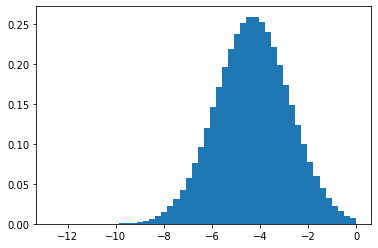

In [43]:
plt.hist(simu_mu(10000000),50,density=True)
plt.show()

In [49]:
def simu_couple():
    mu = simu_mu(1)
    Ec= mu + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    allval = np.zeros(N)
    allval[unknown_indexes]=simu_neg(Ec)
    allval[observation_indexes]=depth
    return (allval, mu)


print(simu_couple())

(array([  0.        ,  -2.33139401,  -0.83520343,  -3.32189229,
        -2.73203259,  -1.56868616,  -2.72134027,  -4.87660254,
        -6.31818542,  -4.64370735,  -4.22981823,  -2.64966229,
        -4.67190873,  -5.12665842,  -4.07897762,  -3.68135138,
        -2.90414243,  -3.4749274 ,  -3.68819826,  -4.02911242,
        -4.        ,  -2.8496568 ,  -4.76632083,  -4.71122142,
        -6.24214158,  -6.90595019,  -6.75110482,  -7.00557401,
        -6.61319596,  -6.86382822,  -9.7883246 , -10.79244175,
       -12.20823831, -12.83095505, -12.850656  , -15.14304574,
       -14.78219429, -14.44756507, -13.50396396, -13.29485676,
       -12.8       , -10.49386922,  -8.93081063,  -8.17899446,
        -9.56924686,  -9.1310724 ,  -9.49210017,  -6.17152102,
        -5.80419508,  -6.80847351,  -6.46840304,  -6.71486904,
        -6.01212146,  -5.89561847,  -4.97741806,  -5.08922471,
        -4.97083563,  -5.5179966 ,  -3.57167612,  -3.51548661,
        -1.        ,  -3.07345488,  -3.56778802,  -2.2

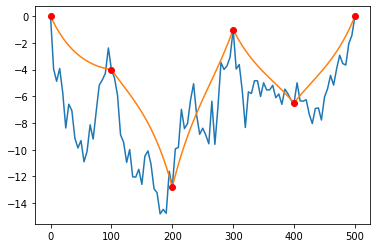

In [50]:
plt.plot(discretization,simu_couple()[0])
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

## __Question 9 :__

In [52]:
K=10000
new_result = np.zeros(K)
old_result = np.zeros(K)

allval4 = np.zeros(N)
allval4[observation_indexes]=depth

for i in range(K):
    allval4[unknown_indexes]= simu_neg(Ec)
    old_result[i]=length(allval4,Delta)
    
    allval = simu_couple()[0]
    new_result[i]=length(allval,Delta)

print(sum(new_result)/K)
print(sum(old_result)/K)

521.7261032369804
521.7873124653529


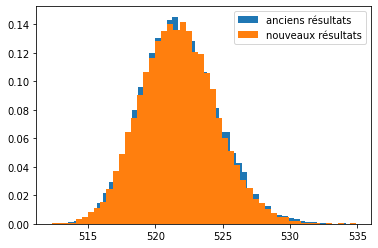

In [53]:
plt.hist(old_result,50,density=True, label = 'anciens résultats')
plt.hist(new_result,50,density=True, label = 'nouveaux résultats')
plt.legend()
plt.show()

In [54]:
print(np.quantile(old_result,[0.025,0.975]))

print(np.quantile(new_result,[0.025,0.975]))

[516.56070518 527.73932401]
[516.60230107 527.4826158 ]


In [55]:
print(np.mean(old_result>525))
print(np.mean(new_result>525))

0.1332
0.1213


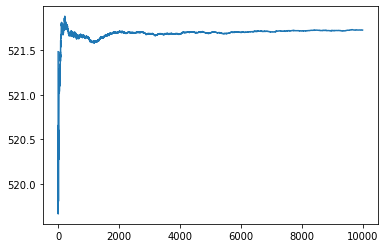

In [56]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(new_result)/indice_simu)
plt.show()